In [1]:
# Dataset - 2 : Decision Tree Email Spam Classification Dataset

# 1. Import necessary libraries
# Explanation:
# This cell imports the necessary Python libraries for data handling, model building, evaluation,
# and visualization, just as we did for the Obesity dataset.

import pandas as pd  # For data manipulation and analysis (like tables)
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # The Decision Tree model and its visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # To evaluate the model's performance
import matplotlib.pyplot as plt  # For creating basic plots and visualizations
import seaborn as sns  # For creating more advanced and statistical visualizations
from sklearn.model_selection import GridSearchCV  # For automatically finding the best model parameters

In [2]:
# 2: Load the Dataset
# Explanation:
# This cell loads the email spam dataset from the emails.csv file into a pandas DataFrame.
# It then displays the first few rows, provides information about the data types and non-null values,
# and shows the count of missing values in each column.

# Load the Email Spam Classification Dataset
try:
    data_spam = pd.read_csv('emails.csv')
except FileNotFoundError:
    print("Error: emails.csv not found. Make sure the file is in the correct location.")
    exit()

# Display the first few rows to understand the data
print("First 5 rows of Spam dataset:")
print(data_spam.head())

# Get some basic information about the dataset
print("\nInformation about the Spam dataset:")
print(data_spam.info())

# Check for missing values
print("\nMissing values in the Spam dataset:")
print(data_spam.isnull().sum())

First 5 rows of Spam dataset:
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Information about the Spam data

In [3]:
# 3: Separate Features and Target, and Split Data
# Explanation:
# In this cell, we separate the features (all columns except the target) from the target
# variable ('spam', where 0 typically represents not spam and 1 represents spam).
# We then split the data into training and testing sets, with 30% allocated for testing and
# a random_state for reproducibility.

# Separate features (X) and target (y)
# Identify non-numeric columns in the original dataframe
non_numeric_cols_spam = data_spam.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in Spam dataset:", non_numeric_cols_spam)

# Drop the non-numeric columns from the feature set
X_spam = data_spam.drop(['spam'] + list(non_numeric_cols_spam), axis=1)
y_spam = data_spam['spam']  # Target variable ('spam' column: 0 for not spam, 1 for spam)

# Split the data into training and testing sets
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    X_spam, y_spam, test_size=0.3, random_state=42
)

print("\nShape of X_train_spam (training features):", X_train_spam.shape)
print("\nShape of X_test_spam (testing features):", X_test_spam.shape)
print("\nShape of y_train_spam (training target):", y_train_spam.shape)
print("\nShape of y_test_spam (testing target):", y_test_spam.shape)

Non-numeric columns in Spam dataset: Index(['Email No.'], dtype='object')

Shape of X_train_spam (training features): (3620, 3000)

Shape of X_test_spam (testing features): (1552, 3000)

Shape of y_train_spam (training target): (3620,)

Shape of y_test_spam (testing target): (1552,)


In [4]:
# 4: Initialize and Train the Decision Tree Model
# Explanation:
# This cell creates an instance of the DecisionTreeClassifier with initial hyperparameters
# (criterion, max_depth, min_samples_leaf, random_state) and trains it using the email spam training
# features (X_train_spam) and target labels (y_train_spam).

# Initialize the Decision Tree model
dt_model_spam = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)

# Train the Decision Tree model on the training data
dt_model_spam.fit(X_train_spam, y_train_spam)

print("\nDecision Tree model trained for Email Spam Classification.")


Decision Tree model trained for Email Spam Classification.



Accuracy of the Decision Tree model (Spam): 0.9948

Classification Report (Spam):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1531
           1       1.00      0.65      0.79        20
           3       0.00      0.00      0.00         1

    accuracy                           0.99      1552
   macro avg       0.66      0.55      0.60      1552
weighted avg       0.99      0.99      0.99      1552


Confusion Matrix (Spam):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


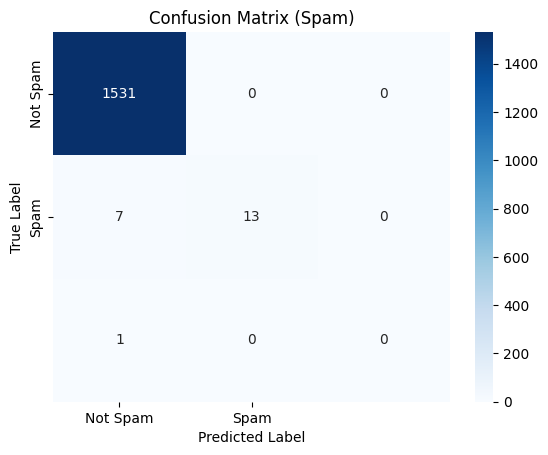

In [5]:
# 5: Make Predictions and Evaluate the Model
# Explanation:
# This cell uses the trained spam classification model (dt_model_spam) to make predictions
# on the unseen test data (X_test_spam). It then evaluates the model's performance using accuracy,
# a classification report (precision, recall, F1-score), and a confusion matrix visualized as a heatmap.
# The class labels in the confusion matrix are explicitly set to 'Not Spam' and 'Spam'.

# Make predictions on the test data
y_pred_spam = dt_model_spam.predict(X_test_spam)

# Evaluate the model
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)
print(f"\nAccuracy of the Decision Tree model (Spam): {accuracy_spam:.4f}")

print("\nClassification Report (Spam):")
print(classification_report(y_test_spam, y_pred_spam))

print("\nConfusion Matrix (Spam):")
cm_spam = confusion_matrix(y_test_spam, y_pred_spam)
sns.heatmap(cm_spam, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Spam)')
plt.show()

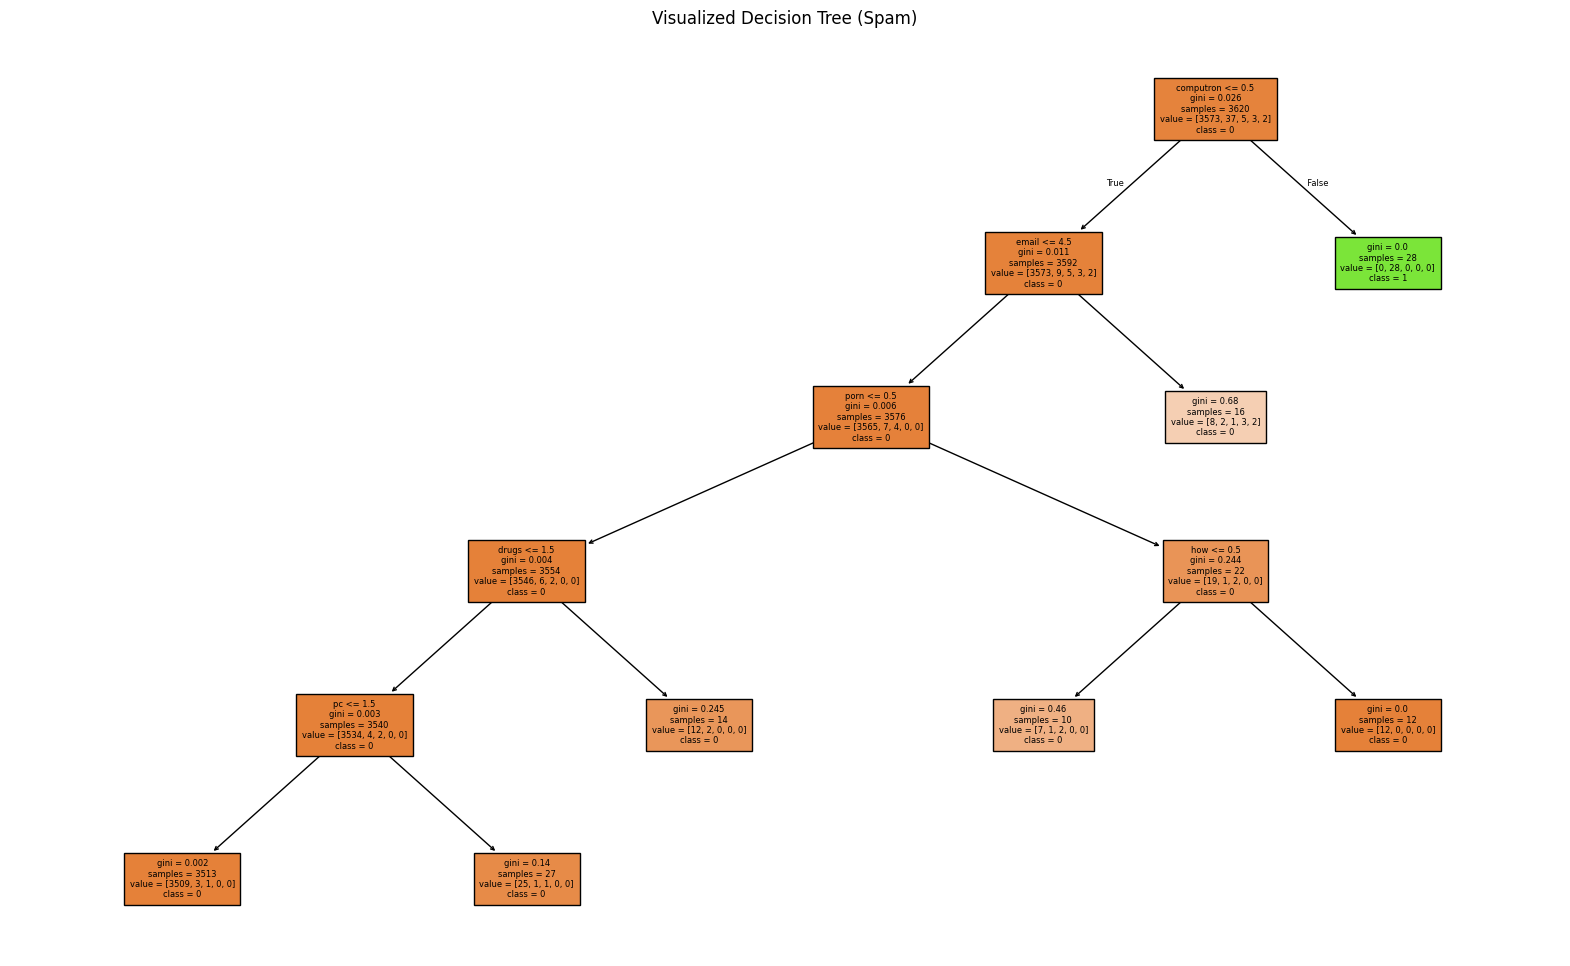

In [6]:
# 6: Visualize the Decision Tree (Spam)
# Explanation:
# This cell visualizes the learned Decision Tree for spam classification.
# We use plot_tree to display the decision rules. We also ensure that the class_names are a
# list of strings based on the unique values in the y_spam target variable. Note that the resulting
# tree might be very large and complex, potentially requiring adjustment of figsize and fontsize for
# better readability.

# Visualize the Decision Tree (Spam) - may be very large
import numpy as np

plt.figure(figsize=(20, 12))
plot_tree(dt_model_spam, filled=True, feature_names=X_spam.columns,
          class_names=[str(c) for c in np.unique(y_spam)], fontsize=6) # Adjust fontsize if needed
plt.title("Visualized Decision Tree (Spam)")
plt.show()

In [7]:
# 7: Hyperparameter Tuning
# Explanation:
# This cell performs hyperparameter tuning for the email spam classification model using GridSearchCV.
# It defines a range of hyperparameters to test (criterion, max_depth, min_samples_leaf),
# performs cross-validation to find the best combination, and then evaluates the performance of the
# best model on the test set.

# --- Hyperparameter Tuning ---
param_grid_spam = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 10, 20, 30]
}

grid_search_spam = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_spam, cv=5)
grid_search_spam.fit(X_train_spam, y_train_spam)

print("\nBest Hyperparameters (Spam):", grid_search_spam.best_params_)

best_dt_spam = grid_search_spam.best_estimator_
y_pred_best_spam = best_dt_spam.predict(X_test_spam)
accuracy_best_spam = accuracy_score(y_test_spam, y_pred_best_spam)
print(f"\nAccuracy with Best Hyperparameters (Spam): {accuracy_best_spam:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Best Hyperparameters (Spam): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}

Accuracy with Best Hyperparameters (Spam): 0.9948
